In [1]:
#### IMPORTING LIBRARIES ####
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pyroomacoustics as pra
from scipy.io import wavfile 
from scipy.signal import chirp, spectrogram
from scipy.optimize import minimize
import IPython
from playsound import playsound 
import simpleaudio as sa
  

In [2]:
#### GENERATING THE SINE SWEEP ####
w1 = 1
w2 = 1
fs = 44100
T = 1
t = np.linspace(0,T,T*fs)
sweep = np.sin((w1*T/np.log(w2/w1))*(np.exp((t/T)*np.log(w2/w1)) - 1))
audio = sweep * (2**15 - 1) / np.max(np.abs(sweep))
audio = audio.astype(np.int16)

c:\users\salma\documents\manuel\universidad\master\segundoaño\segundo\project course\calibration\project-course\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
c:\users\salma\documents\manuel\universidad\master\segundoaño\segundo\project course\calibration\project-course\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


In [3]:
#fs, audio = wavfile.read("examples_input_samples_cmu_arctic_us_axb_a0006.wav")

In [3]:
#play_obj = sa.play_buffer(audio, 1, 2, fs)
#play_obj.wait_done()
wavfile.write('sweep3266641.wav', fs, audio)
#playsound('sweep3266641.wav')

c:\users\salma\documents\manuel\universidad\master\segundoaño\segundo\project course\calibration\project-course\lib\site-packages\pyroomacoustics\room.py:1049: UserWarning: Using absorption parameter is deprecated. In the future, use materials instead.
  "Using absorption parameter is deprecated. In the future, use materials instead."
c:\users\salma\documents\manuel\universidad\master\segundoaño\segundo\project course\calibration\project-course\lib\site-packages\pyroomacoustics\room.py:1412: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = a3.Axes3D(fig)


(0.0, 4.0)

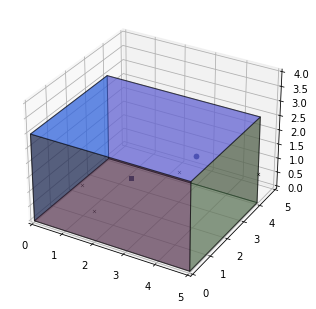

In [75]:
#### DESIGNING THE ROOM ####

pol = np.array([[0,0], [0,4], [5,4], [5,0]]).T
room = pra.Room.from_corners(pol, fs=16000, max_order=10, absorption=0.1)
room.extrude(3)
# Adding the source
nSources = 2;
Xsource = np.array([3,2])
Ysource = np.array([4,2])
Zsource = np.array([1,1])

room.add_source(np.array([Xsource[0],Ysource[0],Zsource[0]]), signal= 'sweep3266641.wav')
room.add_source(np.array([Xsource[1],Ysource[1],Zsource[1]]), signal= 'sweep3266641.wav')

# Adding the microphone
Xmics = [3,5,2,1]
Ymics =[3,4,0,1]
Zmics = [1,1,1,1]
R = np.array([Xmics,Ymics,Zmics])
room.add_microphone_array(pra.MicrophoneArray(R, room.fs))

fig, ax = room.plot()
ax.set_xlim([0,5])
ax.set_ylim([0,5])
ax.set_zlim([0,4])

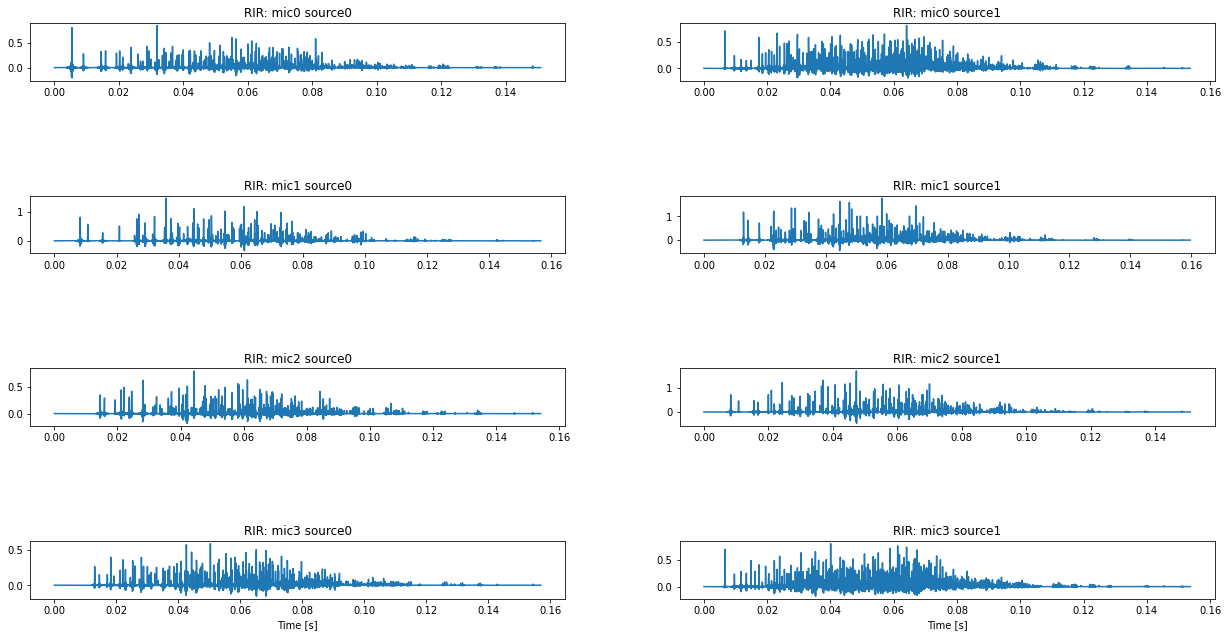

In [76]:
#### COMPUTING RIR ####
RIR = room.compute_rir()
# Plot and apply the RIR on the audio file
room.plot_rir()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
RIRR = plt.show()
#room.simulate()
#room.mic_array.to_wav('aaa.wav', norm=True, bitdepth=np.int16)

In [89]:
#### Computing time of first reflection ####
time = [[0,0,0,0],[0,0,0,0]];

for m in range(0,len(Xmics)):
    for t in range(0,nSources):
        for n in range(1,len(room.rir[m][0]) - 1):
            if ((room.rir[m][t][n - 1] < room.rir[m][t][n]) & (room.rir[m][t][n + 1] < room.rir[m][t][n]) & (room.rir[m][t][n] > np.mean(room.rir[m][t]))):
                time[t][m] = n/16000;
                #print('Room Impulse Response empieza en: ', time, 'segundos')
                #print('Muestra numero:', n)
                break;
        print('Room Impulse Response Mic', m,'Source', t, 'empieza en: ', time[t][m], 'segundos')
        print('Muestra numero:', n)

Room Impulse Response Mic 0 Source 0 empieza en:  0.004625 segundos
Muestra numero: 74
Room Impulse Response Mic 0 Source 1 empieza en:  0.006625 segundos
Muestra numero: 106
Room Impulse Response Mic 1 Source 0 empieza en:  0.0078125 segundos
Muestra numero: 125
Room Impulse Response Mic 1 Source 1 empieza en:  0.012625 segundos
Muestra numero: 202
Room Impulse Response Mic 2 Source 0 empieza en:  0.014125 segundos
Muestra numero: 226
Room Impulse Response Mic 2 Source 1 empieza en:  0.0080625 segundos
Muestra numero: 129
Room Impulse Response Mic 3 Source 0 empieza en:  0.012875 segundos
Muestra numero: 206
Room Impulse Response Mic 3 Source 1 empieza en:  0.006625 segundos
Muestra numero: 106


In [43]:
#### Computing distance between mic and speaker ####
## Si obtenemos la distancia teniendo en cuenta el primer valor
## que no es 0 en el RIR, no hay que restar al tiempo un valor
## delta.
Xmics_ = np.asarray(Xmics)
Ymics_ = np.asarray(Ymics)
Zmics_ = np.asarray(Zmics)
c = 343.2 #Velocidad del sonido en m/s
delta = 0.0025 #Delay del aparato (2 ms)
#distance = (time -delta )* c;
distance_real = []
for i in range(0, len(Xmics)):
    distance_real.append(np.sqrt(abs(Xsource - Xmics_[i])**2 + abs(Ysource - Ymics_[i])**2))
print('Distancia real entre micro0 y altavoz:', distance_real[0], 'metros');
print('Distancia real entre micro1 y altavoz:', distance_real[1], 'metros');
print('Distancia real entre micro2 y altavoz:', distance_real[2], 'metros');
print('Distancia real entre micro3 y altavoz:', distance_real[3], 'metros');
print('Distancia mediante RIR entre micrófono y altavoz:', distance, 'metros') 

Distancia real entre micro0 y altavoz: [1.] metros
Distancia real entre micro1 y altavoz: [2.] metros
Distancia real entre micro2 y altavoz: [4.12310563] metros
Distancia real entre micro3 y altavoz: [3.60555128] metros
Distancia mediante RIR entre micrófono y altavoz: 0.7292999999999998 metros


In [50]:
def fun2(x1):
  
    P = [0,0,0,0];
    D = [0,0,0,0];
    #D1 = [0,0,0,0];
    T = [x1[2]*343.2,x1[2]*343.2,x1[2]*343.2,x1[2]*343.2];
    for i in range(0, 4):
        P[i] = (np.sqrt(abs(x1[0] - Xmics_[i])**2 + abs(x1[1] - Ymics_[i])**2))
        #D1[i] = (np.sqrt(abs(sum(Xsource) - Xmics_[i])**2 + abs(sum(Ysource) - Ymics_[i])**2))
        D[i] = time[i]*343.2;   
    P = np.array(P).T
    D = np.array(D).T
    #print(D1)
    #print(D)
    #P = [(np.sqrt(abs(x1[0] - Xmics[0])**2 + abs(x1[1] - Ymics[0])**2)), (np.sqrt(abs(x1[0] - Xmics[1])**2 + abs(x1[1] - Ymics[1])**2)), (np.sqrt(abs(x1[0] - Xmics[2])**2 + abs(x1[1] - Ymics[2])**2)),(np.sqrt(abs(x1[0] - Xmics[3])**2 + abs(x1[1] - Ymics[3])**2))]
    #D = [distance_real[0], distance_real[1],distance_real[2],distance_real[3]]
    return sum((P - (D - T))**2);
bndsM = ((0,5),(0,4),(0,0.1))
resM = minimize(fun2, (2,2,0), method='SLSQP', bounds=bndsM)
print(resM.x)

[3.24707219e+00 3.75018514e+00 2.52805172e-03]


In [92]:

def fun2([x1,x2]):
  
    P = [[0,0,0,0],[0,0,0,0]];
    D = [[0,0,0,0],[0,0,0,0]];
    #D1 = [0,0,0,0];
    T = [x[1][2]*343.2,x[1][2]*343.2,x[1][2]*343.2,x[1][2]*343.2];
    for i in range(0, 1):
        for j in range(0,4):
            P[i,j] = (np.sqrt(abs(x[i][0] - Xmics_[j])**2 + abs(x[i][1] - Ymics_[j])**2))
            #D1[i] = (np.sqrt(abs(sum(Xsource) - Xmics_[i])**2 + abs(sum(Ysource) - Ymics_[i])**2))
            D[i,j] = time[j][i]*343.2;   
    P = np.array(P).T
    D = np.array(D).T
    #print(D1)
    #print(D)
    #P = [(np.sqrt(abs(x1[0] - Xmics[0])**2 + abs(x1[1] - Ymics[0])**2)), (np.sqrt(abs(x1[0] - Xmics[1])**2 + abs(x1[1] - Ymics[1])**2)), (np.sqrt(abs(x1[0] - Xmics[2])**2 + abs(x1[1] - Ymics[2])**2)),(np.sqrt(abs(x1[0] - Xmics[3])**2 + abs(x1[1] - Ymics[3])**2))]
    #D = [distance_real[0], distance_real[1],distance_real[2],distance_real[3]]
    return sum((P - (D - T))**2);
bndsM = ((0,5),(0,4),(0,0.1))
resM = minimize(fun2, (2,2,0), method='SLSQP', bounds=bndsM)
print(resM.x)

SyntaxError: invalid syntax (<ipython-input-92-ec9c711ec324>, line 1)

In [ ]:
np.sqrt(abs(-0.12831171 - x_mic0)**2 + abs(0.39109573 - y_mic0)**2)
print(np.sqrt(abs(0 - x_mic0)**2 + abs(0 - y_mic0)**2))
print(np.sqrt(abs(0 - x_mic0)**2 + abs(2.00000024 - y_mic0)**2))